# indah wulandari 202231051

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ile_path = 'sales(in).csv'
sales_data = pd.read_csv(file_path)

sales_data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [8]:
numeric_cols = sales_data.select_dtypes(include=['float64', 'int64']).columns
data_for_clustering = sales_data[numeric_cols]
data_cleaned = data_for_clustering.apply(pd.to_numeric, errors='coerce').dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 106 entries, W0 to Normalized 51
dtypes: float64(52), int64(54)
memory usage: 671.7 KB


In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

pd.DataFrame(data_scaled, columns=numeric_cols).head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.173919,0.228600,0.046817,-0.126810,0.261727,0.197725,0.320853,0.875257,-0.279445,0.328879,...,-0.896267,-0.263463,-0.094387,0.282308,0.600801,-1.183443,-0.428828,-0.659373,-0.891511,-0.110890
1,-0.157764,-0.249221,-0.490115,-0.569780,-0.196719,-0.660624,-0.278886,-0.504996,-0.500980,-0.508909,...,-0.371585,0.438369,0.741373,-0.824292,-0.853567,0.321079,0.587434,-0.903710,0.769424,-1.250744
2,-0.157764,0.148963,-0.106592,-0.052982,0.032504,-0.114402,-0.203919,0.261811,0.163624,-0.280421,...,-0.109243,2.777809,-0.474278,-0.519023,0.091772,0.509144,2.402188,0.317979,0.260975,-0.198571
3,0.256839,-0.089947,0.276931,-0.348295,-0.043904,-0.270465,-0.053984,0.261811,0.237469,0.100392,...,0.415439,0.711303,-0.930148,-0.747975,-0.344538,0.133014,1.349631,-0.031075,-0.281371,-0.227798
4,-0.074843,-0.328858,0.276931,0.094675,-0.273127,-0.192434,-0.053984,0.338492,-0.057910,-0.051933,...,-0.109243,0.945247,-0.132376,1.083639,-0.489975,-0.431182,-0.755483,0.597223,-0.145785,-0.081663


C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

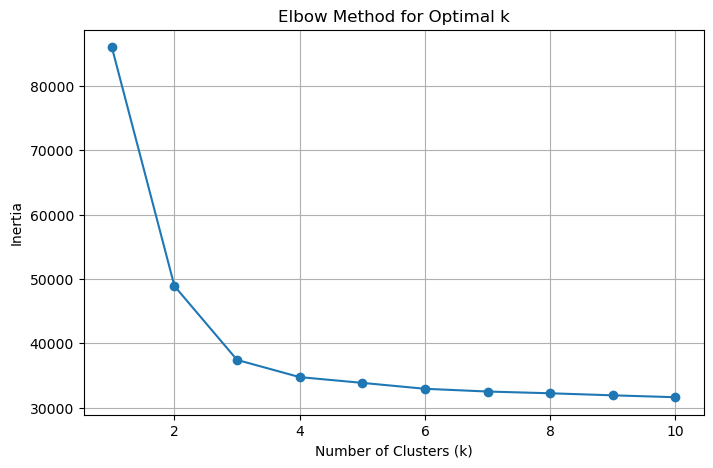

In [10]:
inertia = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [11]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)
data_cleaned['Cluster'] = clusters
data_cleaned.head()

C:\Users\Indah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51,Cluster
0,11,12,10,8,13,12,14,21,6,14,...,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39,0
1,7,6,3,2,7,1,6,3,3,3,...,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00,0
2,7,11,8,9,10,8,7,13,12,6,...,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36,0
3,12,8,13,5,9,6,9,13,13,11,...,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35,0
4,8,5,13,11,6,7,9,14,9,9,...,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40,0


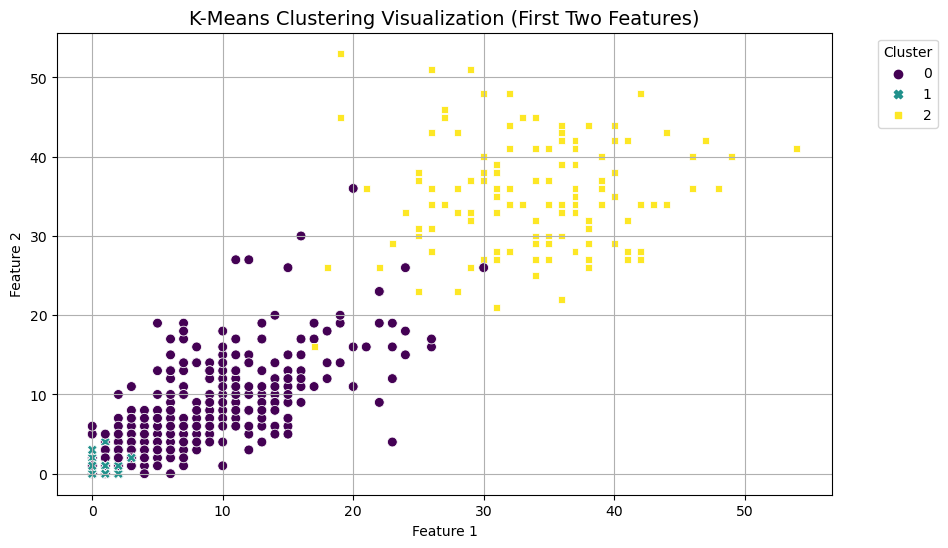

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_cleaned.iloc[:, 0], 
    y=data_cleaned.iloc[:, 1], 
    hue=data_cleaned['Cluster'], 
    palette='viridis', 
    style=data_cleaned['Cluster'], 
    s=50
)
plt.title('K-Means Clustering Visualization (First Two Features)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()
